In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('legend', fontsize=18)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util

import jupyterthemes as jt
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'


/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [36]:
dfs_mc = {a : root_pandas.read_root("../CreatePairTuples/MC_Pairs_weighted_D_2pi.root") for a in "D".split()}
#dfs_mc = {a : root_pandas.read_root("../CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "D".split()}

dfs_mc_unw = {a : root_pandas.read_root("MC_Pairs_D.root", "D") for a in "D".split()}



#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

In [4]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mc.keys()):
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    dfs_mc[key] = R2h_module.applyCuts(dfs_mc[key], nomCuts=True)
    dfs_mc[key + '_2pi'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=False)
    #dfs_mc[key + '_pi_p'] = R2h_module.applyCutsPair(dfs_mc[key],
    #                                                         nomCuts=True,h2Proton=True)
    #dfs_mc[key].eval('h2_mass_TOF = h2_p/h2_Betta*sqrt(1-h2_Betta**2)', inplace=True)
    #dfs_mc[key].eval('h1_mass_TOF = h1_p/h1_Betta*sqrt(1-h1_Betta**2)', inplace=True)



D
Entries before cut  320413
Q2>1.0 and Q2<4.0 320413  (100.00  %)
0.2<h1_p<5.0  320413  (100.00  %)
inelasticity < 0.85 320413  (100.00  %)
h1_pid = pions (trigger) 320413  (100.00  %)
2.2 < nu <4.2 320413  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 320413  (100.00  %)
10< h1_th 320413  (100.00  %)
Theta/P fiducial region selected for trigger hadron 320413  (100.00  %)
Nom cuts for the trigger applied 141962  (44.31  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 141962  (100.00  %)
2.2 < nu < 4.2 141962  (100.00  %)
secondary hadrons are pions 141962  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 123598  (87.06  %)
kinematic limits for h2_z 123368  (99.81  %)
kinematic limits for dphi 123203  (99.87  %)
kinematic limits for pair_mass 117274  (95.19  %)
leading hadrons are pions 117274  (100.00  %)
0.2<h2_p<5.0 117274  (100.00  %)
0.2<h1_p<5.0 117274  (100.00  %)
25 degree separation between pion and electron.  This is 

In [5]:
import os, os.path

path = 'images/particle_misid/'
if not os.path.isdir(path):
    os.mkdir(path)

In [6]:
particle_names = {11:'$e^\\pm$',13:'$\\mu$',211:'$\\pi$', 321:'$K^\\pm$', 2212:'$p/\\bar p$',9999:'unknown', -1:'tot. mis-id.'}
def idplot(slicevar,particle,target='D', slices=None, xlabel=None, ylabel=None, query=None,
           fillstyle=None,blankLabel=False,showLegend=True,nbins=10):
    for key in dfs_mc.keys():
        q = 'h1_truth_pid!=-9999 and h2_truth_pid!=-9999 and h2_T4>-999 and h2_z>0.05 and abs(h1_pid)==211'
        #/q+= "and nu<3.5 and nu>3.0"
        if '_' in key: continue
        if target not in key: continue
        df = dfs_mc[key+'_2pi'].query(q)
    
        if slices is None:
            yy = df.eval(slicevar)
            slices = np.linspace(yy.quantile(.005), yy.quantile(.995), nbins+1)
        
        if 'pass_recon' in df.keys():
            df = df.query('pass_recon')
        if query is not None:
            df = df.query(query)
            
        xx = df.eval(slicevar)
        
        
        xs = {}
        ys = {}
        dys = {}
        
        colors = {11:'k', 9999:'g',-1:'k',2212:'r',321:'b',11:'g',13:'y'}
        plotted_pids=[2212,321,11,-1]
        for j,truth_id in enumerate(plotted_pids):
            shift = (slices[1]-slices[0])*(j+1)/10 
            if truth_id == -1:
                shift = 0.0
            xs[truth_id] = []
            ys[truth_id] = []
            dys[truth_id] = []
            for i in range(len(slices)-1):
                df_slice = df.query(f'{slicevar}>{slices[i]} and {slicevar}<{slices[i+1]}')
                
                q_id = f'abs({particle}_truth_pid) == {truth_id}' if truth_id != -1\
                            else f'{particle}_truth_pid != {particle}_pid'
                n,d = len(df_slice.query(q_id)),len(df_slice)
                if d == 0:
                    continue
                xs[truth_id].append((slices[i]+slices[i+1])/2)
                ys[truth_id].append(n/d)
                dys[truth_id].append(np.sqrt(n*(d-n))/d**(3/2))
            if truth_id != -1:
                linestyle = ''
            else:
                linestyle='-'
            plt.errorbar(np.add(xs[truth_id],shift),
                         ys[truth_id],
                         dys[truth_id], marker='o',
                         linestyle=linestyle,
                             label=particle_names[truth_id] if not blankLabel else ' ',
                             color = colors[truth_id],
                         fillstyle=fillstyle)
    plt.gca().set_ylabel('fraction of events')
    plt.gca().set_xlabel(xlabel)
    plt.gca().set_ylim(1e-4,1)
    plt.gca().set_yscale('log')
    #plt.gca().axhline(0,color='0.7', linestyle='--')
    #plt.gca().axvline(0,color='0.7', linestyle='--')
    if showLegend:
        plt.legend()

In [7]:
def multipanel(slicevar, particles= 'h1 h2'.split(), titles='leading associated'.split(),nbins=10, query='1==1',*varg,**kwarg):
    
    fig,axs = plt.subplots(2,len(particles), figsize=(6*len(particles), 10))
    for nucleus,fillstyle,label in ('D','full',True),:#('Pb','none',True):
        for i,particle in enumerate(particles):
            plt.sca(axs[0][i])
            plt.gca().set_title(titles[i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == 211 and {query}', target=nucleus, 
                   fillstyle=fillstyle,blankLabel=not label, showLegend=(i==1),nbins=nbins)
            plt.gca().set_xlabel(None)
            plt.sca(axs[1][i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == -211 and {query}', target=nucleus, 
                   fillstyle=fillstyle,blankLabel=not label,showLegend=False,nbins=nbins)
            if i != 0:
                axs[0][i].set_ylabel(None)
                axs[1][i].set_ylabel(None)
                
    axs[0][0].text(0,0.9,'identified as $\pi^+$',transform=axs[0][0].transAxes)
    axs[1][0].text(0,0.9,'identified as $\pi^-$',transform=axs[1][0].transAxes)
    fig.tight_layout()

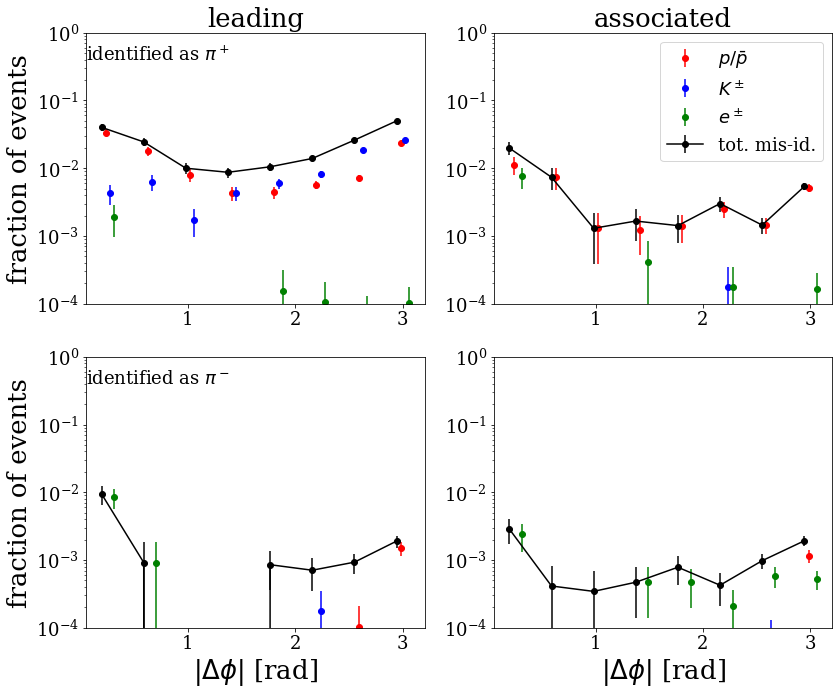

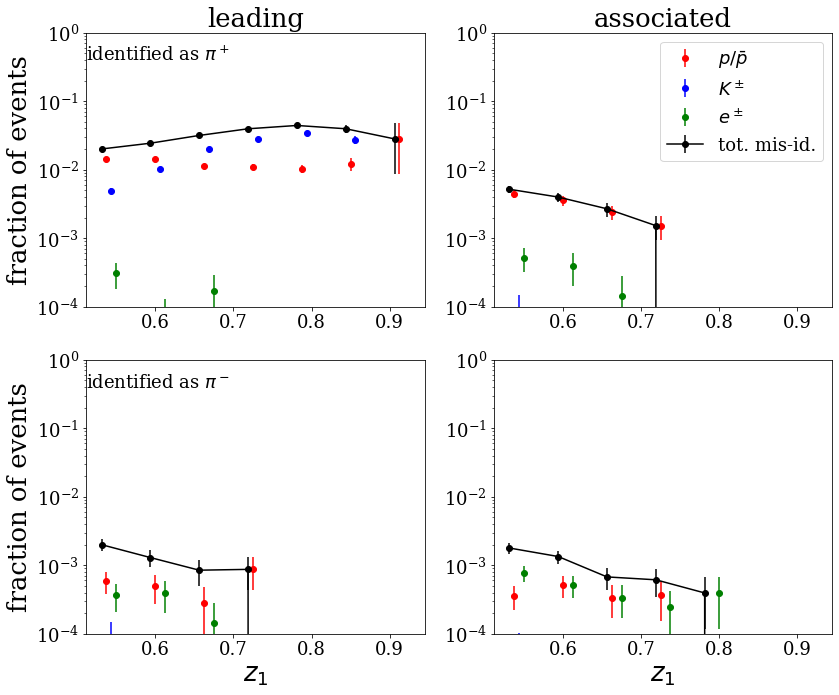

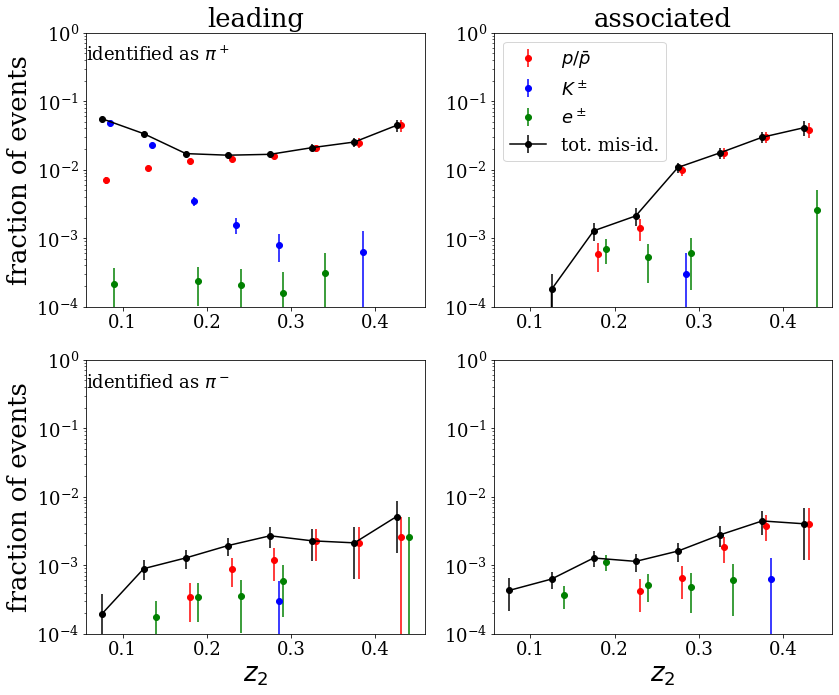

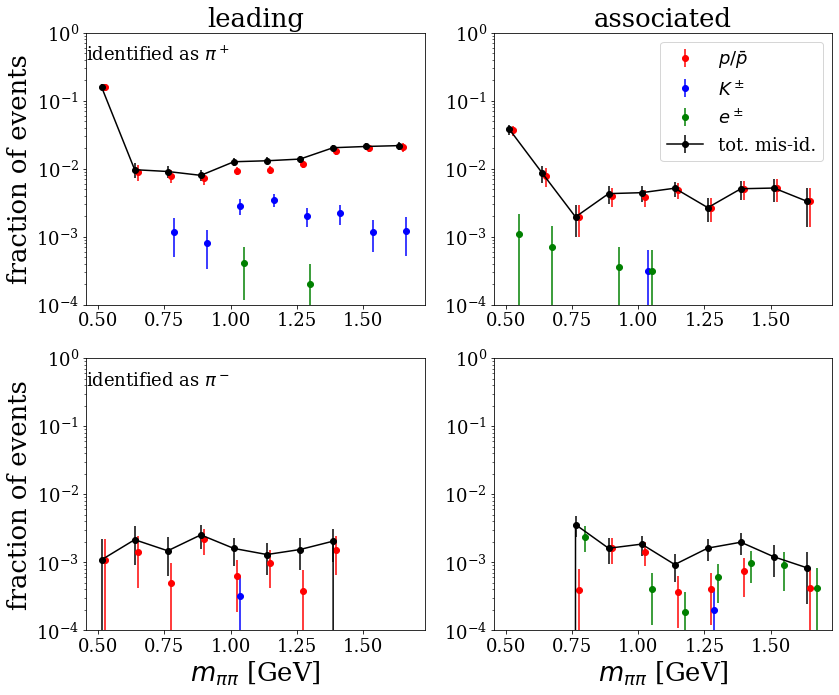

In [8]:
#query = 'h1_p==h1_p'
#query = 'h1_p>.1 and h2_p>.1'
#query = '(h1_th>20 or h1_pid == -211) and (h2_th>20 or h2_pid == -211)'
#minpt=0.0
#query = f'pair_pt > {minpt} and pair_pt >{minpt}'
query = 'h1_z+h2_z<1 and (abs(h1_th-h2_th)>2.40*10/3. or abs(h1_ph-h2_ph)>5.43*10/3.)'

#query='h1_z+h2_z<1 and (h1_th>15 or h1_p>2.7 or h1_pid<0) and (h2_th>15 or h2_pid<0)'
#query = 'dphi > 1'
query = 'h1_z+h2_z<1 and h1_pid*h2_pid<0'
multipanel('dphi',xlabel='$|\Delta\phi|$ [rad]',query=query,slices=np.linspace(0,3.14, 9))
plt.savefig('images/particle_misid/misid_dphi_cm.png',bbox_inches='tight')
plt.show()
#multipanel('dphi_lab',xlabel= '$|\Delta \phi_{\mathrm{lab}}|$ [rad]',query=query)
#plt.savefig('images/particle_misid/misid_dphi_lab.png',bbox_inches='tight')
#plt.show()
#multipanel('drap', xlabel='$\Delta y$',query=query)
#plt.savefig('images/particle_misid/misid_drap.png',bbox_inches='tight')
#plt.show()
multipanel('h1_z', xlabel='$z_1$',query=query,slices=np.linspace(0.5,1, 9))
plt.savefig('images/particle_misid/misid_z1.png',bbox_inches='tight')
plt.show()
multipanel('h2_z', xlabel='$z_2$',query=query,slices=np.linspace(0.05,0.45, 9))
plt.savefig('images/particle_misid/misid_z2.png',bbox_inches='tight')
plt.show()
multipanel('pair_mass', xlabel='$m_{\\pi\\pi}$ [GeV]',query=query + " and h2_z>0.15",slices=np.linspace(0.45,1.7, 11))
plt.savefig('images/particle_misid/misid_pair_mass.png',bbox_inches='tight')
plt.show()


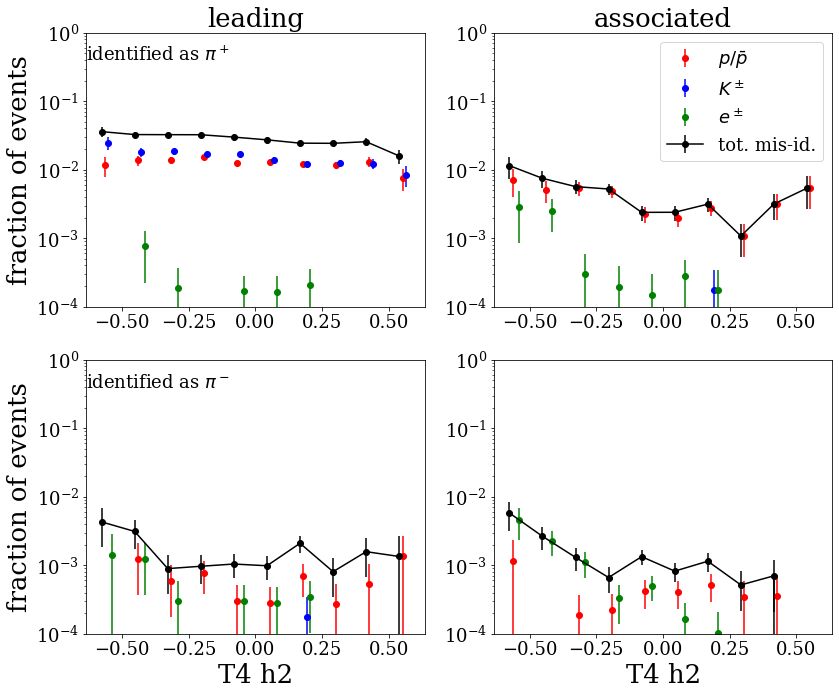

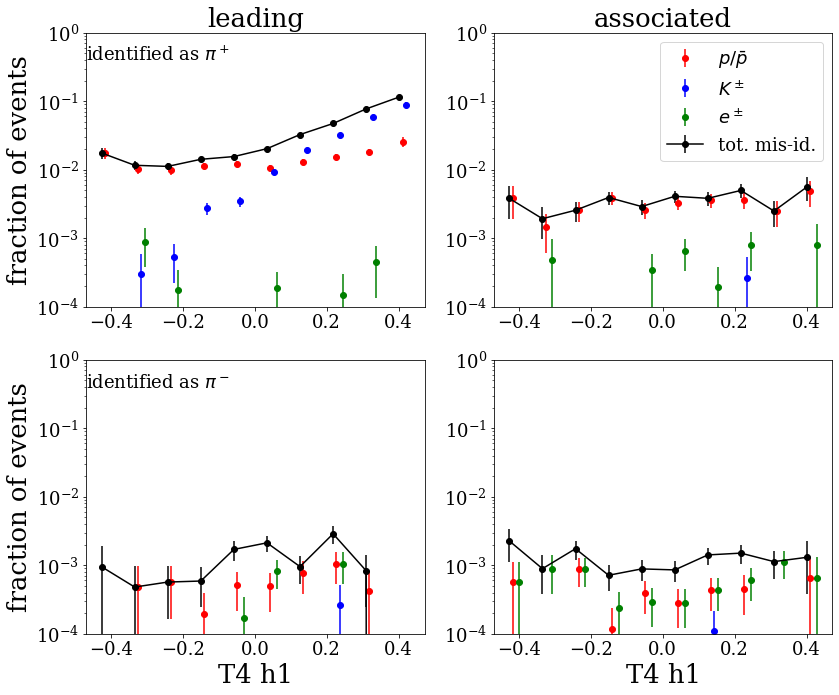

In [9]:
multipanel('h2_T4', xlabel='T4 h2',query=query)
plt.savefig('images/particle_misid/misid_h2_T4_pi.png',bbox_inches='tight')
plt.show()
multipanel('h1_T4', xlabel='T4 h1',query=query)
plt.savefig('images/particle_misid/misid_h1_T4_pi.png',bbox_inches='tight')
plt.show()

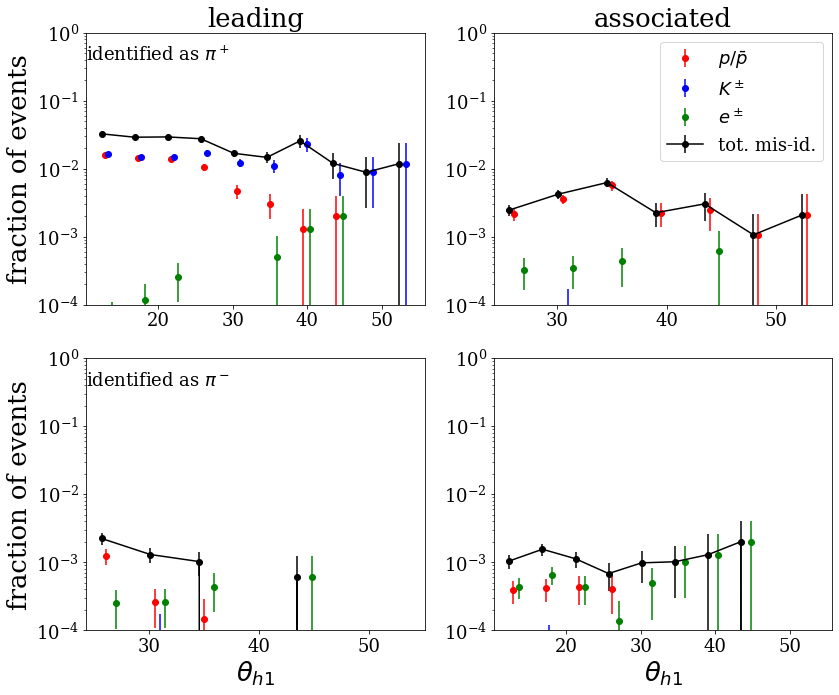

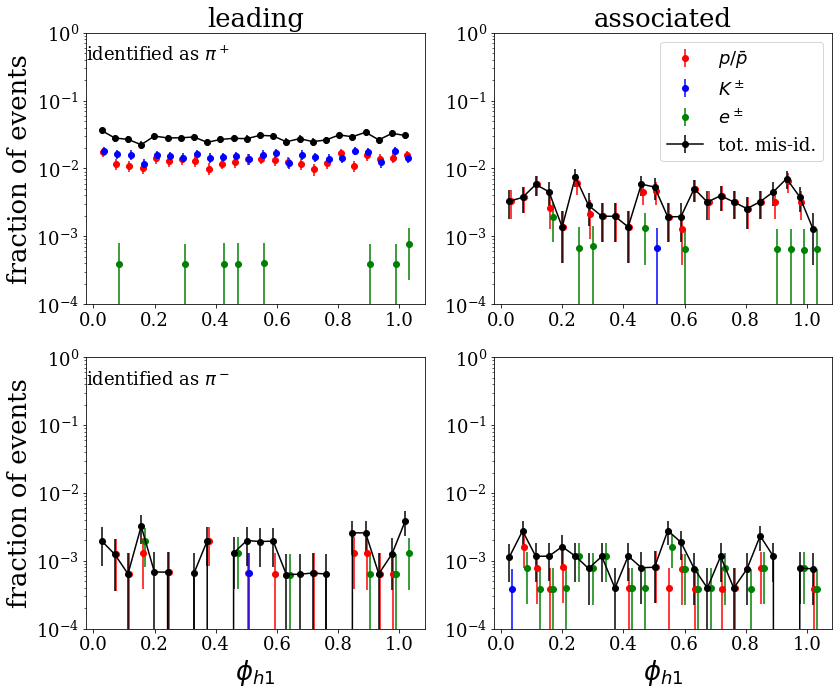

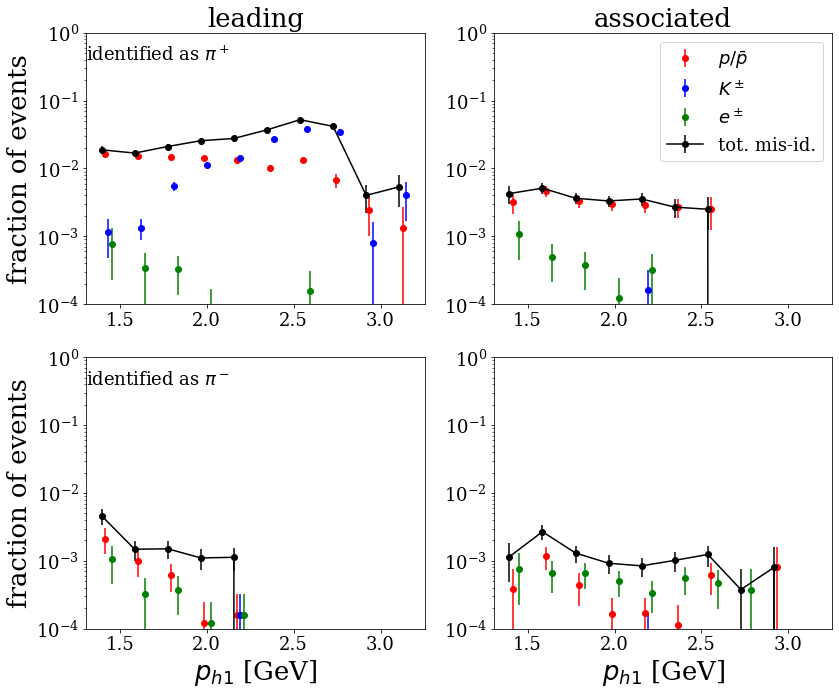

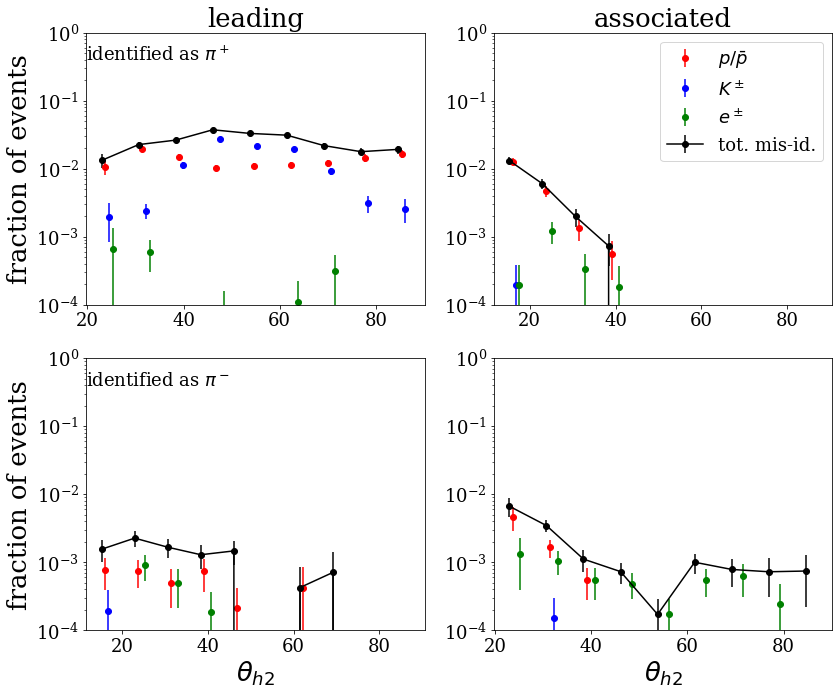

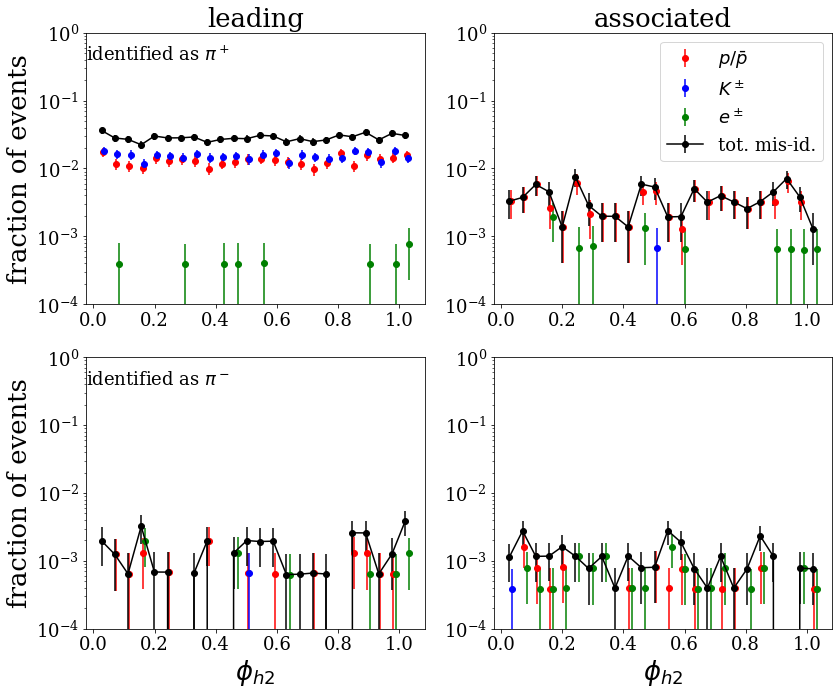

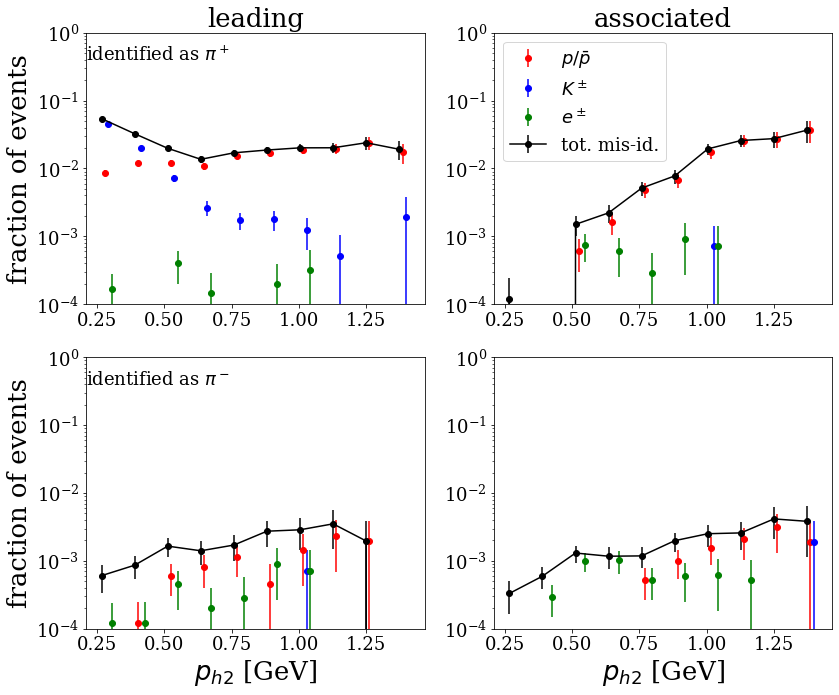

In [10]:
#query = 'h1_FidCut and h2_FidCut'
query = 'h1_p==h1_p'
query = 'h1_z+h2_z<1'
multipanel('h1_th', xlabel='$\\theta_{h1}$',query=query)
plt.savefig('images/particle_misid/misid_h1_th.png',bbox_inches='tight')
plt.show()
multipanel(f'h2_ph%({np.pi/3})', xlabel='$\\phi_{h1}$',query=query,nbins=24)
plt.savefig('images/particle_misid/misid_h1_ph.png',bbox_inches='tight')
plt.show()
multipanel('h1_p', xlabel='$p_{h1}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h1_p.png',bbox_inches='tight')
plt.show()

multipanel('h2_th', xlabel='$\\theta_{h2}$',query=query)
plt.savefig('images/particle_misid/misid_h2_th.png',bbox_inches='tight')
plt.show()
multipanel(f'h2_ph%({np.pi/3})', xlabel='$\\phi_{h2}$',query=query,nbins=24)
plt.savefig('images/particle_misid/misid_h2_ph.png',bbox_inches='tight')
plt.show()
multipanel('h2_p', xlabel='$p_{h2}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h2_p.png',bbox_inches='tight')
plt.show()

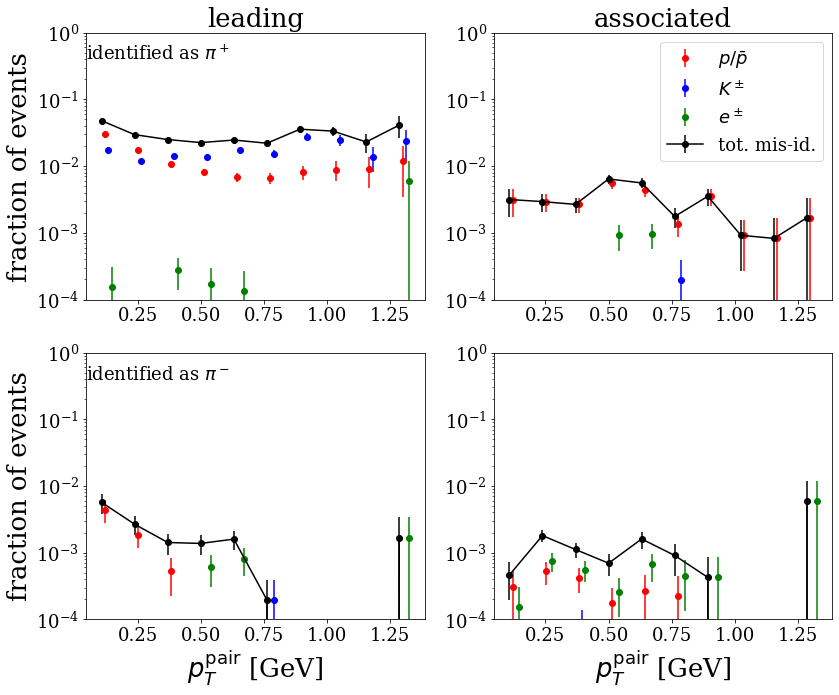

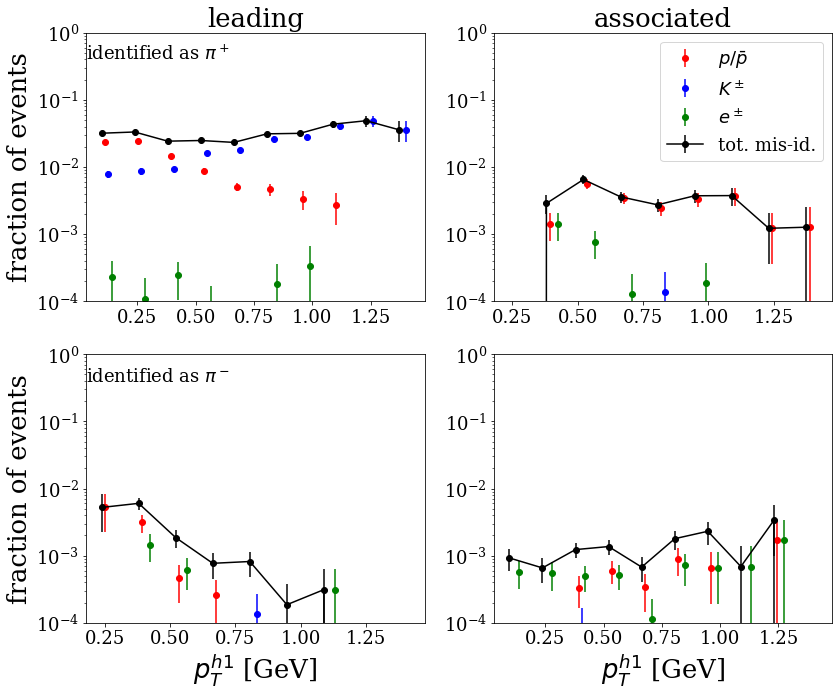

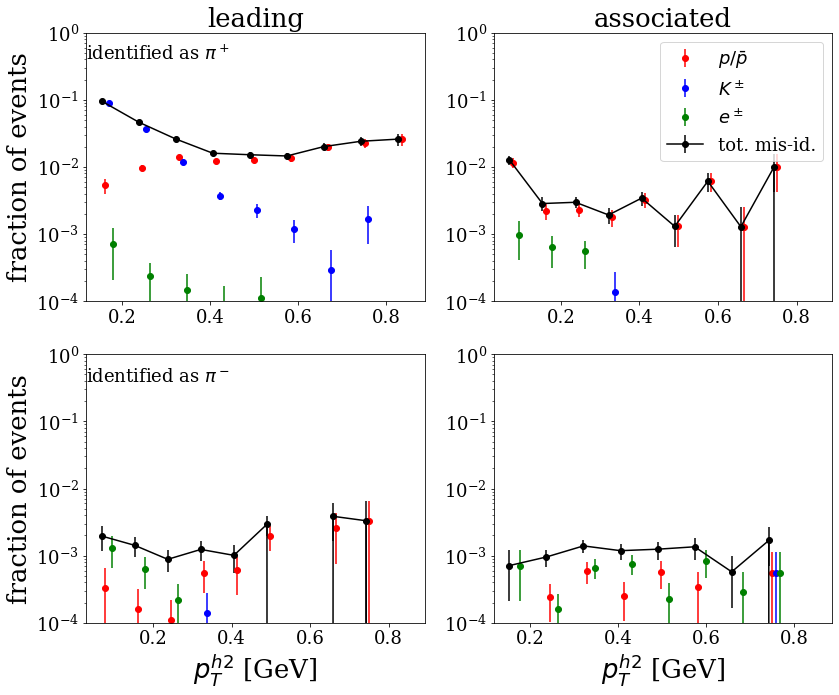

In [11]:
query='h1_z+h2_z<1'
multipanel('pair_pt', xlabel='$p_T^{\\mathrm{pair}}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_pair_pt.png',bbox_inches='tight')
plt.show()
query='h1_p==h1_p'
multipanel('h1_cm_pt', xlabel='$p_T^{h1}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h1_cm_pt.png',bbox_inches='tight')
plt.show()
query='h1_p==h1_p'
multipanel('h2_cm_pt', xlabel='$p_T^{h2}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h2_cm_pt.png',bbox_inches='tight')
plt.show()

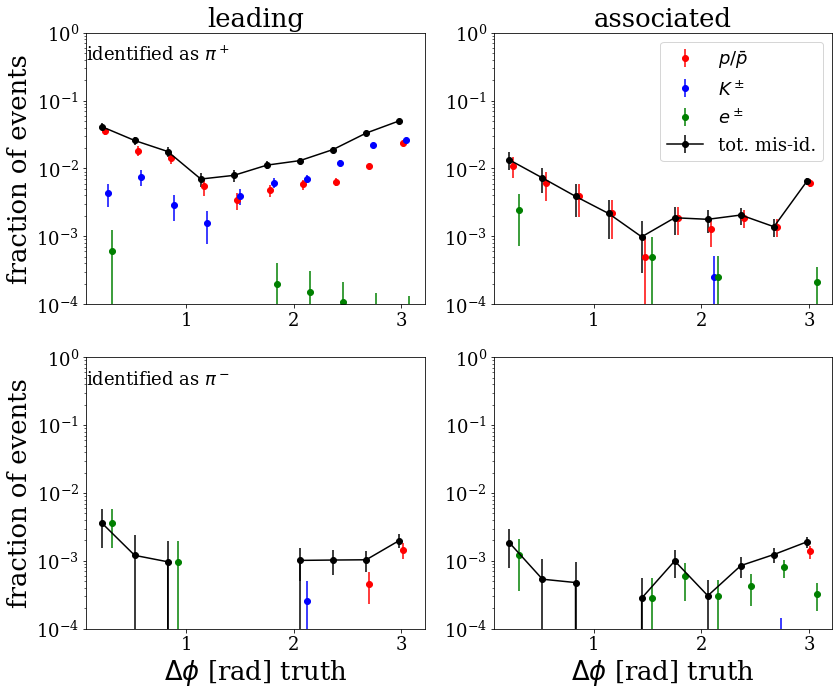

In [12]:
query='h1_z+h2_z<1 and h1_z>h2_z'
multipanel('dphi_truth', xlabel='$\\Delta\\phi$ [rad] truth',query=query)
plt.savefig('images/particle_misid/misid_dphi_truth.png',bbox_inches='tight')
plt.show()

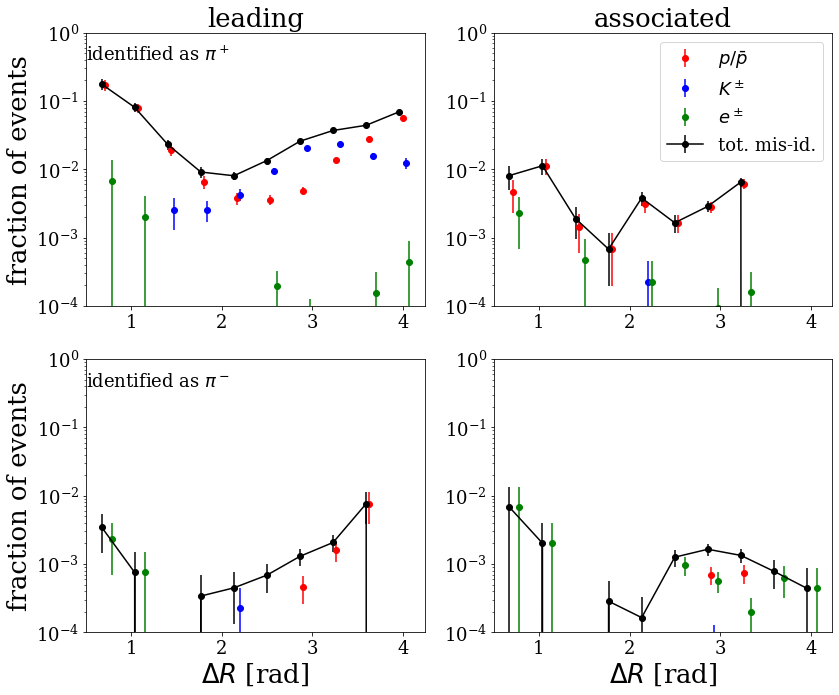

In [13]:
query='h1_z+h2_z<1 and h1_z>h2_z'
multipanel('sqrt(dphi**2+drap**2)', xlabel='$\\Delta R$ [rad]',query=query)
plt.savefig('images/particle_misid/misid_hypot.png',bbox_inches='tight')
plt.show()

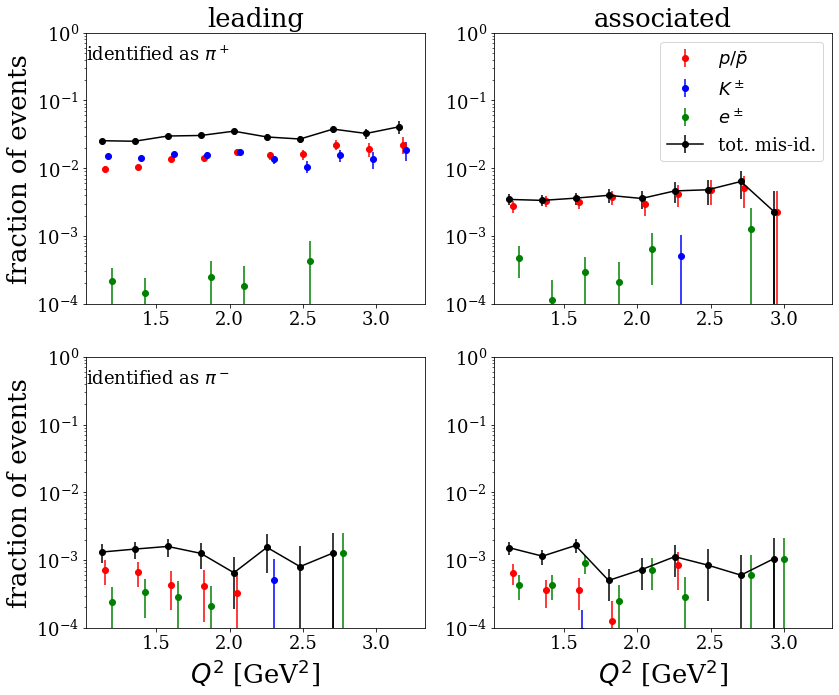

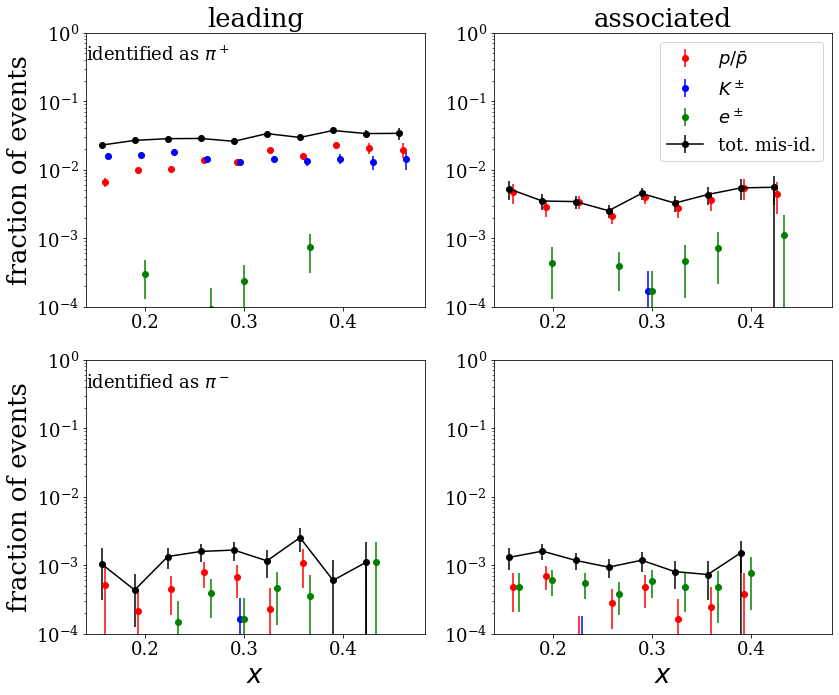

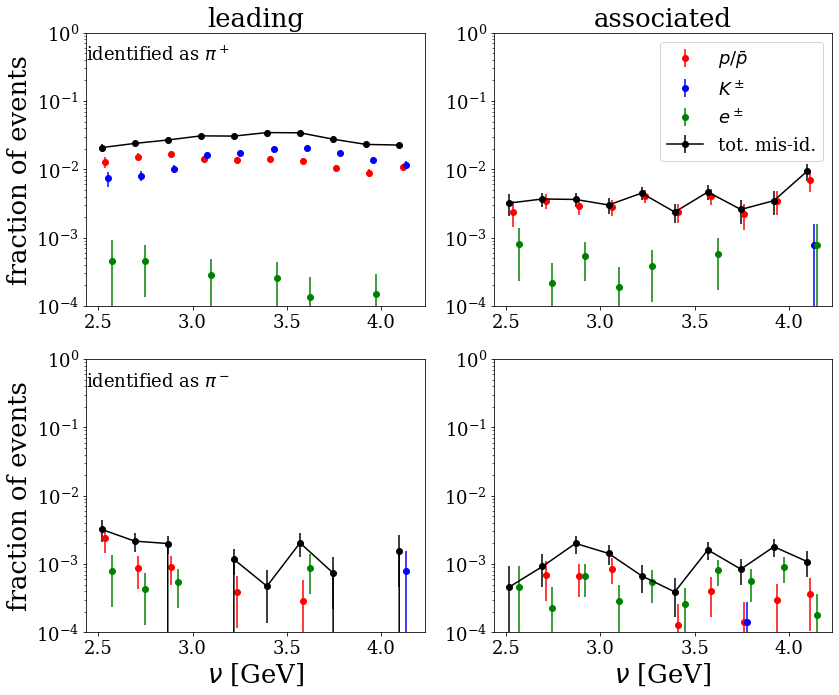

In [14]:
query='h1_z+h2_z<1'
multipanel('Q2', xlabel='$Q^2$ [GeV$^2$]',query=query)
plt.savefig('images/particle_misid/misid_Q2.png',bbox_inches='tight')
plt.show()

query='h1_z+h2_z<1'
multipanel('x', xlabel='$x$',query=query)
plt.savefig('images/particle_misid/misid_x.png',bbox_inches='tight')
plt.show()

query='h1_z+h2_z<1'
multipanel('nu', xlabel='$\\nu$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_nu.png',bbox_inches='tight')
plt.show()

In [15]:
def frac(df, q, reweight=True):
    if reweight==False:
        d = len(df)
        n = len(df.query(q))
        return n/d, (np.sqrt(n*(d-n))/d**(3/2) if d>0 else 1)
    else:
        d = len(df)
        n = sum(df.query(q).weight_reco)/np.mean(df.weight_reco)
        return n/d, (np.sqrt(n*(d-n))/d**(3/2) if d>0 else 1)
        
def printfrac(txt,df,q,decimals=2):
    f = frac(df,q)
    print(txt + f"   %.{decimals}f+-%.{decimals}f%%"%(f[0]*100,f[1]*100))


df = dfs_mc['D_2pi'].query('h2_truth_pid > -9990 and h2_z>0.07')
printfrac('frac misidentified h2', df,'abs(h2_truth_pid) != 211')
printfrac('frac misidentified h2 pi+', df.query('h2_pid==211'),'abs(h2_truth_pid) != 211')
printfrac('frac misidentified h2 pi-',  df.query('h2_pid==-211'),'abs(h2_truth_pid) != 211')



frac misidentified h2   0.13+-0.01%
frac misidentified h2 pi+   0.27+-0.03%
frac misidentified h2 pi-   0.08+-0.01%


In [16]:

def printstuff(dfq):
    df = dfq.query('h2_truth_pid > -9990 and h1_pid*h2_pid<0')
    printfrac('frac misidentified h2', df,'abs(h2_truth_pid) != 211')
    printfrac('frac misidentified h2 pi+', df.query('h2_pid==211'),'abs(h2_truth_pid) != 211')
    printfrac('frac misidentified h2 pi-',  df.query('h2_pid==-211'),'abs(h2_truth_pid) != 211')
    df = dfq.query('h1_truth_pid > -9990')
    printfrac('frac misidentified h1 tot', df,'abs(h1_truth_pid) != 211')
    printfrac('frac misidentified h1 K', df,'abs(h1_truth_pid) == 321')
    printfrac('frac misidentified h1 p',df,'abs(h1_truth_pid) == 2212')

    printfrac('frac misidentified h1 pi+', df.query('h1_pid==211'),'abs(h1_truth_pid) != 211')
    printfrac('frac misidentified h1 pi+ p', df.query('h1_pid==211'),'abs(h1_truth_pid) == 2212')
    printfrac('frac misidentified h1 pi-', df.query('h1_pid==-211'),'abs(h1_truth_pid) != 211')

    df = dfq.query('h1_truth_pid > -9990 and h2_truth_pid > -9990')
    printfrac('frac at least one misidentified', df,'abs(h1_truth_pid) != 211 or abs(h2_truth_pid) != 211')
    
    
    d = sum(df.weight_reco)
    np = sum(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212').weight_reco)
    nK = sum(df.query('abs(h1_truth_pid) == 321 or abs(h2_truth_pid) == 321').weight_reco)
    nMis = sum(df.query('abs(h1_truth_pid) == 321 or abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212  or abs(h2_truth_pid) == 321').weight_reco)
    syst_estimate = np/d + nK/d/2
    
    print('at least one proton',np/d)
    print('at least one kaon',nK/d)
    print('at least one other',nMis/d)
    print('systematic error estimate',syst_estimate)
    
    print()
dfq = dfs_mc['D_2pi']
n = len(dfq)
printstuff(dfq)

#query='(h1_th>15 or h1_p>2.7 or h1_pid<0) and (h2_th>15 or h2_pid<0)'
#dfq = dfs_mc['D_2pi'].query(query)
#print(len(dfq)/n)
#printstuff(dfq)

#query='h1_z+h2_z<1 and (h1_th>15 or h1_p>2.7 or h1_pid<0) and (h2_th>15 or h2_pid<0)'
#dfq = dfs_mc['D_2pi'].query(query)
#print(len(dfq)/n)
#printstuff(dfq)

query='h1_z+h2_z<1'
dfq = dfs_mc['D_2pi'].query(query)
print(len(dfq)/n)
printstuff(dfq)

query='h1_z+h2_z<1 and h1_pid*h2_pid<0'
dfq = dfs_mc['D_2pi'].query(query)
print(len(dfq)/n)
printstuff(dfq)



frac misidentified h2   0.13+-0.01%
frac misidentified h2 pi+   0.27+-0.03%
frac misidentified h2 pi-   0.08+-0.01%
frac misidentified h1 tot   2.06+-0.04%
frac misidentified h1 K   1.20+-0.03%
frac misidentified h1 p   0.84+-0.03%
frac misidentified h1 pi+   2.84+-0.07%
frac misidentified h1 pi+ p   1.15+-0.04%
frac misidentified h1 pi-   0.13+-0.02%
frac at least one misidentified   2.15+-0.05%
at least one proton 0.009203859169421826
at least one kaon 0.01170783331711913
at least one other 0.020911692486540973
systematic error estimate 0.01505777582798139

1.0
frac misidentified h2   0.13+-0.01%
frac misidentified h2 pi+   0.27+-0.03%
frac misidentified h2 pi-   0.08+-0.01%
frac misidentified h1 tot   2.06+-0.04%
frac misidentified h1 K   1.20+-0.03%
frac misidentified h1 p   0.84+-0.03%
frac misidentified h1 pi+   2.84+-0.07%
frac misidentified h1 pi+ p   1.15+-0.04%
frac misidentified h1 pi-   0.13+-0.02%
frac at least one misidentified   2.15+-0.05%
at least one proton 0.00920385

In [17]:
query='pair_mass>0.5 and h1_z+h2_z>0.99 and h1_truth_pid>-500 and h2_truth_pid>-500'
dfq = dfs_mc['D_2pi'].query(query)
print(len(dfq.query('abs(h1_truth_pid)!=211 or abs(h2_truth_pid)!=211'))/len(dfq))

0.06701030927835051


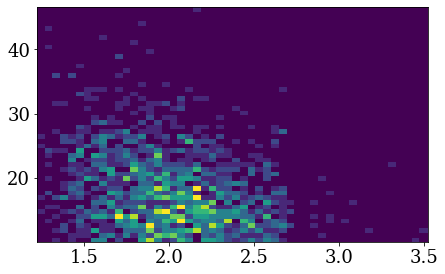

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 2., 3., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.20001963, 0.23119395, 0.26236827, 0.29354258, 0.3247169 ,
        0.35589122, 0.38706553, 0.41823985, 0.44941417, 0.48058848,
        0.5117628 , 0.54293711, 0.57411143, 0.60528575, 0.63646006,
        0.66763438, 0.6988087 , 0.72998301, 0.76115733, 0.79233165,
        0.82350596, 0.85468028, 0.8858546 , 0.91702891, 0.94820323,
        0.97937755, 1.01055186, 1.04172618, 1.0729005 , 1.10407481,
        1.13524913, 1.16642345, 1.19759776, 1.22877208, 1.2599464 ,
        1.29112071, 1.32229503, 1.35346935, 1.38464366, 1.41581798,
        1.4469923 , 1.47816661, 1.50934093, 1.54051525, 1.57168956,
        1.60286388, 1.6340382 , 1.66521251, 1.69638683, 1.72756115,
        1.75873546]),
 array([10.02301216, 11.6195499 , 13.21608765, 14

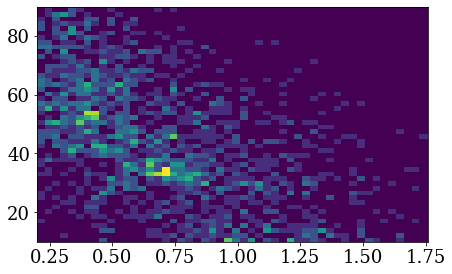

In [20]:
dfq=dfs_mc['D_2pi'].query('h1_truth_pid ==2212')
plt.hist2d(dfq.h1_p,dfq.h1_th,bins=50)
plt.show()
plt.hist2d(dfq.h2_p,dfq.h2_th,bins=50)


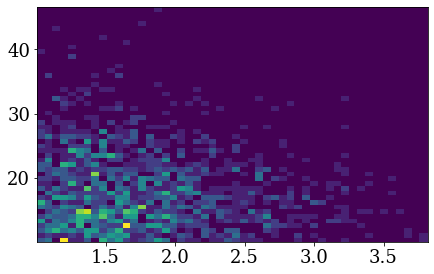

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 2., 3., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.20001963, 0.23119395, 0.26236827, 0.29354258, 0.3247169 ,
        0.35589122, 0.38706553, 0.41823985, 0.44941417, 0.48058848,
        0.5117628 , 0.54293711, 0.57411143, 0.60528575, 0.63646006,
        0.66763438, 0.6988087 , 0.72998301, 0.76115733, 0.79233165,
        0.82350596, 0.85468028, 0.8858546 , 0.91702891, 0.94820323,
        0.97937755, 1.01055186, 1.04172618, 1.0729005 , 1.10407481,
        1.13524913, 1.16642345, 1.19759776, 1.22877208, 1.2599464 ,
        1.29112071, 1.32229503, 1.35346935, 1.38464366, 1.41581798,
        1.4469923 , 1.47816661, 1.50934093, 1.54051525, 1.57168956,
        1.60286388, 1.6340382 , 1.66521251, 1.69638683, 1.72756115,
        1.75873546]),
 array([10.02301216, 11.6195499 , 13.21608765, 14

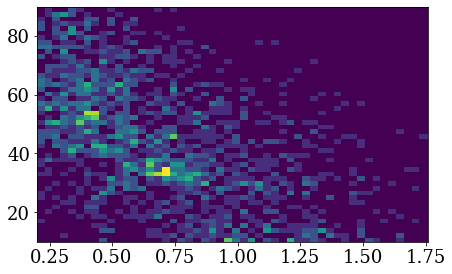

In [21]:
dfq=dfs_mc['D_2pi'].query('h1_truth_pid ==2212')
plt.hist2d(dfq.Q2,dfq.h1_th,bins=50)
plt.show()
plt.hist2d(dfq.h2_p,dfq.h2_th,bins=50)

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 100400  (100.00  %)
2.2 < nu < 4.2 100400  (100.00  %)
secondary hadrons are pions 100400  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 100400  (100.00  %)
kinematic limits for h2_z 100400  (100.00  %)
kinematic limits for dphi 100400  (100.00  %)
kinematic limits for pair_mass 100400  (100.00  %)
leading hadrons are pions 100400  (100.00  %)
0.2<h2_p<5.0 100400  (100.00  %)
0.2<h1_p<5.0 100400  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 100400  (100.00  %)
10<h2_th 100400  (100.00  %)
Theta/P fiducial region selected for secondary hadron 100400  (100.00  %)
10< h1_th 100400  (100.00  %)
Theta/P fiducial region selected for trigger hadron 100400  (100.00  %)
2.6077097505668934
1.5926358854471068
0.5162918770078018
0.3835532371893219
0.49494741183749225
0.6117455138662317
0.9226153782928533
1.739805696913621


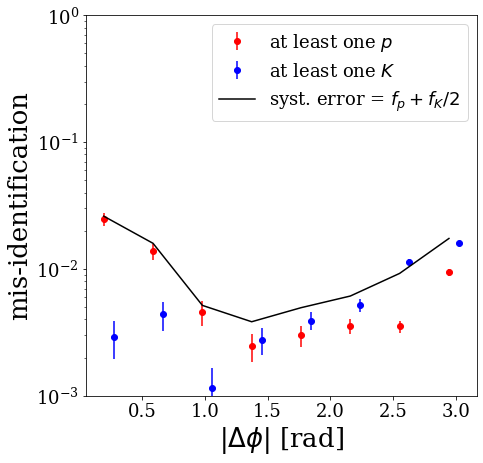

1.8052205986664775
1.082421340629275
0.648175325310635
0.7617265802485634
1.0192102454642475
1.545972335231896
2.1887550200803214
3.225806451612903


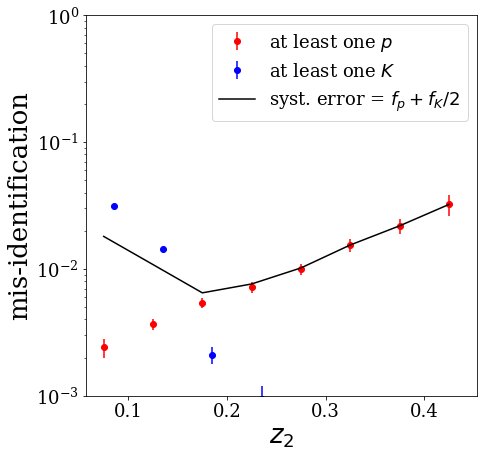

1.5926236378876781
3.5251120018863475
0.6403269754768393
0.8728483273790192
1.1893233264737926
1.162197403480923
0.7872439789178731
0.9667075356031313
0.9926262053318208
1.256952169076752


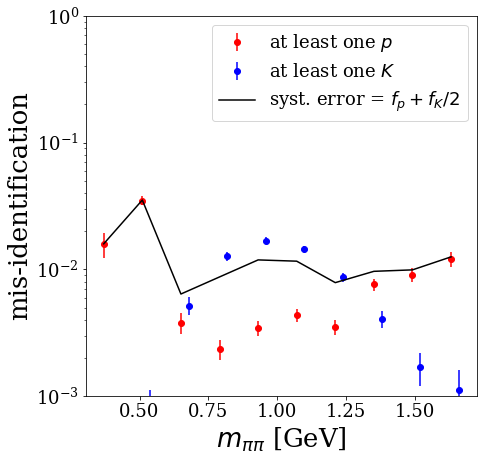

3.3417935702199664
0.8620689655172413
0.5994253442980283
1.166027360059744
1.1971372804163956
1.4991554054054053
1.508252703471827


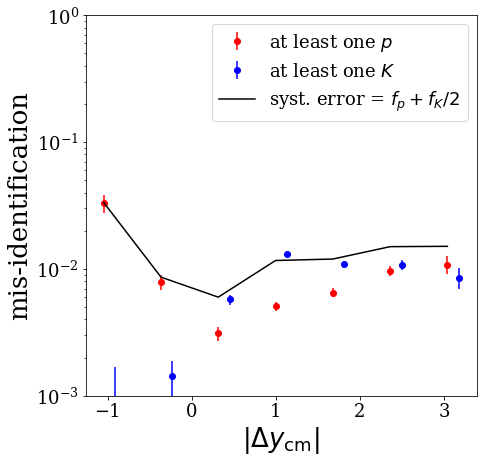

In [21]:

imp.reload(R2h_module)
def unc_plot(df,xvar='dphi',xlabel='$|\\Delta\\phi_{\\mathrm{cm}}|$',bins=None,nbins=8):
    fig,axs = plt.subplots(1,1,figsize=(7,7))
    if 'pass_recon' in df.keys():
        df = df.query('pass_recon')
    
    yy = df.eval(xvar)
    if bins is None:
        bins = np.linspace(yy.quantile(.001), yy.quantile(.999), nbins)
    def weights(df):
        return df.weight_reco/df.weight_reco
        #return df.weight_reco
    nK,x = np.histogram(df.query('abs(h1_truth_pid) == 321 or abs(h2_truth_pid) == 321').eval(xvar),bins=bins,weights=weights(df.query('abs(h1_truth_pid) == 321 or abs(h2_truth_pid) == 321')))
    npr,x = np.histogram(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212').eval(xvar),bins=bins, weights=weights(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212')))
    ntot,x = np.histogram(df.eval(xvar),bins=bins,weights=weights(df))
    
    y = (nK/2+npr)/ntot
    x = np.divide(np.add(x[1:],x[:-1]),2)
    plt.errorbar(x,npr/ntot, np.sqrt(npr*(ntot-npr)/ntot**3),color='r', label = "at least one $p$", 
                 linestyle='', marker='o')
    plt.errorbar(x+0.2*(x[1]-x[0]),nK/ntot, np.sqrt(nK*(ntot-nK)/ntot**3), color='b', label = "at least one $K$", 
                 linestyle='', marker='o')
    plt.errorbar(x,y,color='k', label = "syst. error = $f_p+f_K/2$")
    
    
    plt.gca().set_ylim(.001,1)
    plt.gca().set_yscale('log')
    plt.gca().set_ylabel('mis-identification')
    plt.gca().set_xlabel(xlabel)
    plt.legend()
    for (xx,yy) in zip(x,y):
        print(yy*100,sep='\t')
    

df = R2h_module.applyCutsPair(dfs_mc['D_2pi'].query("h1_p+h2_p<nu and h1_pid*h2_pid<0"))
mass_expr = "(abs(h2_truth_pid)==2212)*.9383+(abs(h2_truth_pid)==321)*.493677+(abs(h2_truth_pid)==211)*.1396"
df.eval(f'h2_truth_p = sqrt((h2_truth_z*nu_truth)**2-({mass_expr})**2)',inplace=True)
df.eval(f'h1_truth_p = sqrt((h1_truth_z*nu_truth)**2-({mass_expr.replace("h2","h1")})**2)',inplace=True)
df = df.query("abs(h1_p/h1_truth_p-1)<.15 and abs(h2_p/h2_truth_p-1)<.15")

unc_plot(df,xvar='dphi',xlabel='$|\\Delta\\phi|$ [rad]',
         bins=np.linspace(R2h_module.mindphi,R2h_module.maxdphi,R2h_module.dpiondphiBinsEdges))
plt.savefig('images/particle_misid/misid_unc_dphicm.png',bbox_inches='tight')
plt.show()
unc_plot(df,xvar='h2_z',xlabel='$z_2$',
         bins=np.linspace(R2h_module.minz2,R2h_module.maxz2,R2h_module.dpionz2BinsEdges))
plt.savefig('images/particle_misid/misid_unc_z2.png',bbox_inches='tight')
plt.show()
unc_plot(df,xvar='pair_mass',xlabel='$m_{\\pi\\pi}$ [GeV]',
           bins=np.linspace(R2h_module.minzmass,R2h_module.maxzmass,R2h_module.dpionMassBinsEdges))
plt.savefig('images/particle_misid/misid_unc_pair_mass.png',bbox_inches='tight')
plt.show()
unc_plot(df,xvar='drap',xlabel='$|\\Delta y_{\\mathrm{cm}}|$')
plt.savefig('images/particle_misid/misid_unc_dy.png',bbox_inches='tight')
plt.show()

In [177]:
df = dfs_mc['D_2pi'].query("h1_z+h2_z<1")
print(min(df.nu),max(df.nu))
print(min(df.Q2),max(df.Q2))
print(min(df.h2_z),max(df.h2_z))

2.3189475536346436 4.19992733001709
1.0000636577606201 3.818652868270874
0.05838474320468593 0.4984680480027739


In [ ]:
plt.hist2d(df.h2_z, df.Q2,bins=100)

In [ ]:
printfrac("h2_th>90", df, "h2_th>90")

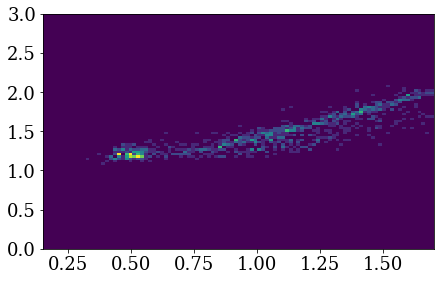

Text(0.5, 0, 'truth pair mass, $\\pi p$ [GeV]')

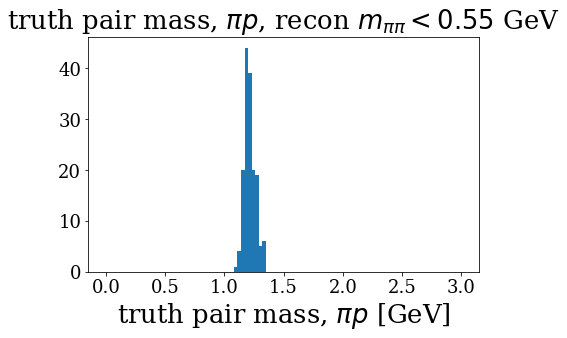

In [132]:
df = dfs_mc['D_2pi'].query("h1_z+h2_z<1 and h1_pid*h2_pid<0")# and pair_mass<0.55 and h2_z>0.15")
dfq = df.query('abs(h1_truth_pid) == 2212')
#plt.hist(df.eval("pair_mass_truth"),bins=100,range=(0,3))
plt.hist2d(dfq.eval("pair_mass"),dfq.eval("pair_mass_truth"),bins=100,range=((0.15,1.7),(0,3)))
#plt.hist(dfq.h2_z,bins=30)
plt.show()
#plt.hist(dfq.eval("pair_mass_truth"),bins=100, range=(0,3))
plt.hist(dfq.query("pair_mass<0.55").eval("pair_mass_truth"),bins=100, range=(0,3))
plt.gca().set_title("truth pair mass, $\pi p$, recon $m_{\pi\pi}<0.55$ GeV")
plt.gca().set_xlabel("truth pair mass, $\pi p$ [GeV]")

#print(np.mean(dfq.query("pair_mass<0.55 and pair_mass_truth<10").eval("pair_mass_truth")))
#print(np.mean(dfq.query("pair_mass<0.55 and pair_mass_truth<10").eval("pair_mass_truth")))

In [74]:
print(list(df.columns))

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1h2x_truth', 'mx_eh1x_truth', 'mx_eh2x_truth', 't_truth', 'Q2_

In [33]:
df = root_pandas.read_root("MC_Pairs_D.root", "D")
df = R2h_module.applyCuts(df, nomCuts=True) #trigger cut

Entries before cut  4011598
Q2>1.0 and Q2<4.0 4011598  (100.00  %)
0.2<h1_p<5.0  4011587  (100.00  %)
inelasticity < 0.85 4011587  (100.00  %)
h1_pid = pions (trigger) 1361079  (33.93  %)
2.2 < nu <4.2 1332615  (97.91  %)
px in gamma* frame is <0.4 GeV 1197980  (89.90  %)
10< h1_th<90 1197973  (100.00  %)
Theta/P fiducial region selected for trigger 1197973  (100.00  %)
Nom cuts for the trigger applied 597865  (49.91  %)


In [34]:
applyCut = R2h_module.applyCut
dataframe=df
print ('Starting election on dipion variables')
dataframe.eval('z_tot = h1_z+ h2_z', inplace=True)
dataframe.eval('h1_e = h1_z*nu', inplace=True)
dataframe.eval('h1_p = sqrt(h1_e*h1_e-0.13957*0.13957)', inplace=True)
dataframe.eval('h2_e = h2_z*nu', inplace=True)

m_h2 = '(0.13957*(abs(h2_pid)==211) + .93827208816*(abs(h2_pid)==2212))'
dataframe.eval(f'h2_p = sqrt(h2_e*h2_e-{m_h2}**2)', inplace=True)
if 'h1_Betta' in dataframe.columns:
    dataframe.eval('h1_mass2_TOF = h1_p**2/h1_Betta**2*(1-h1_Betta**2)', inplace=True)
    dataframe.eval('h2_mass2_TOF = h2_p**2/h2_Betta**2*(1-h2_Betta**2)', inplace=True)
dataframe = applyCut(dataframe, 'Q2>1.0 and Q2<4.0', '1.0< Q2 <4.0')
dataframe = applyCut(dataframe, 'nu>2.2 and nu<4.2', '2.2 < nu < 4.2')

if 'pair_pt' not in dataframe.columns:
    dataframe.eval('pair_pt = sqrt(h1_cm_pt**2+h2_cm_pt**2+2*h2_cm_pt*h1_cm_pt*cos(h1_cm_ph-h2_cm_ph))', inplace=True)

dataframe.eval('pair_pt2 = pair_pt*pair_pt', inplace=True)

dataframe = applyCut(dataframe, 'abs(h2_pid)==211', 'secondary hadrons are pions') 
#dataframe = applyCut(dataframe, '(h1_z+h2_z)<1.0', '(h1_z+h2_z)<1.0')
dataframe = applyCut(dataframe, '(h1_pid*h2_pid)<0.', '(h1_pid*h2_pid)<0, opposite charge pions')
# dataframe = applyCut(dataframe, 'h2_z > %f and h2_z< %f'%(minz2,maxz2), 'kinematic limits for h2_z')
# dataframe = applyCut(dataframe, 'dphi > %f and dphi< %f'%(mindphi,maxdphi), 'kinematic limits for dphi')
# dataframe = applyCut(dataframe, 'pair_mass > %f and pair_mass< %f'%(minzmass,maxzmass), 'kinematic limits for pair_mass')
dataframe = applyCut(dataframe, 'abs(h1_pid)==211', 'leading hadrons are pions')    
dataframe = applyCut(dataframe, 'h2_p>0.2 and h2_p<5.0', '0.2<h2_p<5.0')
dataframe = applyCut(dataframe, 'h1_p>0.2 and h1_p<5.0', '0.2<h1_p<5.0')

if 'h1_cm_pt' in dataframe.columns:
    dataframe = applyCut(dataframe, 'h1_cm_pt*cos(h1_cm_ph)<0.4', 'px in gamma* frame is <0.4 GeV')
elif 'h1_pt' in dataframe.columns:
    dataframe = applyCut(dataframe, 'h1_pt*cos(h1_cm_ph)<0.4', 'px in gamma* frame is <0.4 GeV')

#dataframe = applyCut(dataframe, 'h2_cm_pt>sqrt(0.005) and h1_cm_pt>sqrt(0.005)', 'pT^2>0.005 GeV^2 for both hadrons')
## Theta cuts are not applied in the GiBUU case
## For GiBUU case is the only time isMC=True
if (not False):
    #convert to degrees if necessary
    if max(dataframe['h2_th'])<np.pi:
        dataframe['h2_th'] = dataframe['h2_th']*180/np.pi
    if max(dataframe['h1_th'])<np.pi:
        dataframe['h1_th'] = dataframe['h1_th']*180/np.pi
    dataframe = applyCut(dataframe, 'h1_cm_pt*cos(h1_cm_ph)<0.4', 'px in gamma* frame is <0.4 GeV')


    dataframe = applyCut(dataframe, 'h2_th<90 and h2_th>10', '10<h2_th<90')
    dataframe = applyCut(dataframe, '(h2_pid>0) | (h2_pid==-211 & h2_th<90 & h2_th>25 & (h2_p>0.5 | h2_th>40))','Theta/P fiducial region selected for secondary hadron')
    dataframe = applyCut(dataframe, 'h1_th<90 and h1_th>10', '10< h1_th<90')
    dataframe = applyCut(dataframe, '(h1_pid>0) | (h1_pid==-211 & h1_th<90 & h1_th>25 & (h1_p>0.5 | h1_th>40))','Theta/P fiducial region selected for trigger hadron')
    dataframe = applyCut(dataframe, R2h_module.pair_cut_nom.replace("(h1_p+h2_p)/nu<1.0","1==1"), 'Nom cuts for the pair applied (pi pi)')
df =dataframe

Starting election on dipion variables
1.0< Q2 <4.0 597865  (100.00  %)
2.2 < nu < 4.2 597865  (100.00  %)
secondary hadrons are pions 152972  (25.59  %)
(h1_pid*h2_pid)<0, opposite charge pions 132194  (86.42  %)
leading hadrons are pions 132194  (100.00  %)
0.2<h2_p<5.0 131966  (99.83  %)
0.2<h1_p<5.0 131966  (100.00  %)
px in gamma* frame is <0.4 GeV 131966  (100.00  %)
px in gamma* frame is <0.4 GeV 131966  (100.00  %)
10<h2_th<90 131372  (99.55  %)
Theta/P fiducial region selected for secondary hadron 131087  (99.78  %)
10< h1_th<90 131087  (100.00  %)
Theta/P fiducial region selected for trigger hadron 131087  (100.00  %)
Nom cuts for the pair applied (pi pi) 118640  (90.50  %)


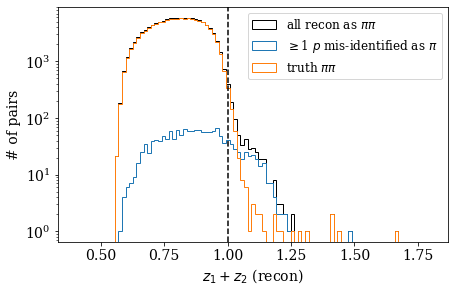

In [51]:
df2 = df.query("h1_pid*h2_pid==-211**2")
bins=np.linspace(0.4,1.8,100)
plt.hist(df2.eval('h1_z+h2_z'), label="all recon as $\pi\pi$",bins=bins,histtype='step', color='k')
plt.hist(df2.query("h1_truth_pid == 2212 or h2_truth_pid == 2212").eval('h1_z+h2_z'), 
         label="$\geq$1 $p$ mis-identified as $\pi$",bins=bins,histtype='step')
plt.hist(df2.query("h1_truth_pid*h2_truth_pid == -211*211").eval('h1_z+h2_z'), 
         label="truth $\pi\pi$",bins=bins,histtype='step')
plt.gca().set_yscale("log")
plt.legend(fontsize=12)
plt.ylabel("# of pairs",fontsize=14)
plt.xlabel("$z_1+z_2$ (recon)",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(1, color='k',linestyle='--')

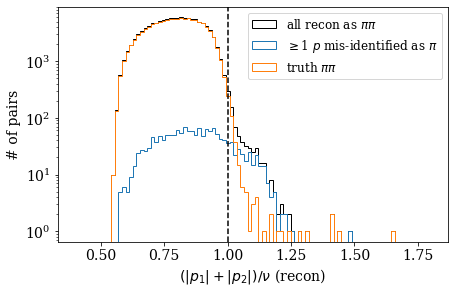

In [35]:
df2 = df.query("h1_pid*h2_pid==-211**2")
bins=np.linspace(0.4,1.8,100)
plt.hist(df2.eval('(h1_p+h2_p)/nu'), label="all recon as $\pi\pi$",bins=bins,histtype='step', color='k')
plt.hist(df2.query("h1_truth_pid == 2212 or h2_truth_pid == 2212").eval('(h1_p+h2_p)/nu'), 
         label="$\geq$1 $p$ mis-identified as $\pi$",bins=bins,histtype='step')
plt.hist(df2.query("h1_truth_pid*h2_truth_pid == -211*211").eval('(h1_p+h2_p)/nu'), 
         label="truth $\pi\pi$",bins=bins,histtype='step')
plt.gca().set_yscale("log")
plt.legend(fontsize=12)
plt.ylabel("# of pairs",fontsize=14)
plt.xlabel("$(|p_1|+|p_2|)/\\nu$ (recon)",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(1, color='k',linestyle='--')

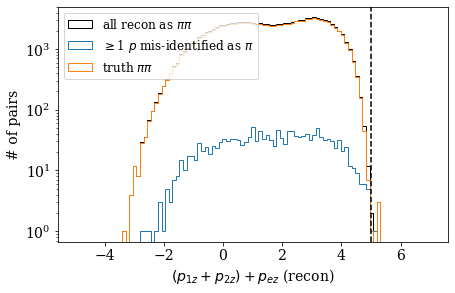

In [49]:
df2 = df.query("h1_pid*h2_pid==-211**2")
expr = '(h1_p*cos(h1_th)+h2_p*cos(h2_th)+e_p*cos(e_th))'
bins=np.linspace(-10+5.014,2+5.014,100)
plt.hist(df2.eval(expr), label="all recon as $\pi\pi$",bins=bins,histtype='step', color='k')
plt.hist(df2.query("h1_truth_pid == 2212 or h2_truth_pid == 2212").eval(expr), 
         label="$\geq$1 $p$ mis-identified as $\pi$",bins=bins,histtype='step')
plt.hist(df2.query("h1_truth_pid*h2_truth_pid == -211*211").eval(expr), 
         label="truth $\pi\pi$",bins=bins,histtype='step')
plt.gca().set_yscale("log")
plt.legend(fontsize=12)
plt.ylabel("# of pairs",fontsize=14)
plt.xlabel("$(p_{1z}+p_{2z})+p_{ez}$ (recon)",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(5.014, color='k',linestyle='--')

(array([4.000e+00, 3.000e+00, 8.000e+00, 6.000e+00, 9.000e+00, 1.200e+01,
        1.300e+01, 8.100e+01, 2.480e+02, 3.240e+02, 3.950e+02, 4.350e+02,
        4.800e+02, 5.320e+02, 5.810e+02, 5.920e+02, 7.600e+02, 7.640e+02,
        8.300e+02, 9.320e+02, 9.970e+02, 1.043e+03, 1.191e+03, 1.185e+03,
        1.411e+03, 1.507e+03, 1.532e+03, 1.646e+03, 1.784e+03, 1.845e+03,
        1.977e+03, 2.131e+03, 2.196e+03, 2.441e+03, 2.409e+03, 2.542e+03,
        2.613e+03, 2.792e+03, 2.924e+03, 2.830e+03, 2.987e+03, 2.923e+03,
        3.199e+03, 3.189e+03, 3.211e+03, 3.248e+03, 3.059e+03, 3.310e+03,
        3.254e+03, 3.245e+03, 3.260e+03, 3.231e+03, 3.151e+03, 3.107e+03,
        3.068e+03, 3.028e+03, 2.955e+03, 2.843e+03, 2.798e+03, 2.685e+03,
        2.572e+03, 2.461e+03, 2.302e+03, 2.204e+03, 2.232e+03, 2.044e+03,
        1.950e+03, 1.867e+03, 1.742e+03, 1.718e+03, 1.505e+03, 1.492e+03,
        1.335e+03, 1.255e+03, 1.173e+03, 1.127e+03, 1.003e+03, 9.520e+02,
        8.450e+02, 7.610e+02, 3.840e+0

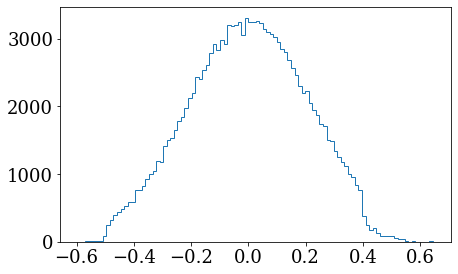

In [22]:
plt.hist(dfs_mc['D'].h1_T4, bins=100,histtype='step')

Starting election on dipion variables
This is Data
1.0< Q2 <4.0 2390185  (100.00  %)
2.2 < nu < 4.2 2343379  (98.04  %)
secondary hadrons are pions 806175  (34.40  %)
(h1_pid*h2_pid)<0, opposite charge pions 806175  (100.00  %)
kinematic limits for h2_z 738742  (91.64  %)
kinematic limits for dphi 737646  (99.85  %)
kinematic limits for pair_mass 605431  (82.08  %)
leading hadrons are pions 288671  (47.68  %)
0.2<h2_p<5.0 288213  (99.84  %)
0.2<h1_p<5.0 288213  (100.00  %)
25 degree separation between pion and electron.  This is a dumb cut 288213  (100.00  %)
10<h2_th 288159  (99.98  %)
Theta/P fiducial region selected for secondary hadron 273543  (94.93  %)
10< h1_th 273543  (100.00  %)
Theta/P fiducial region selected for trigger hadron 273543  (100.00  %)


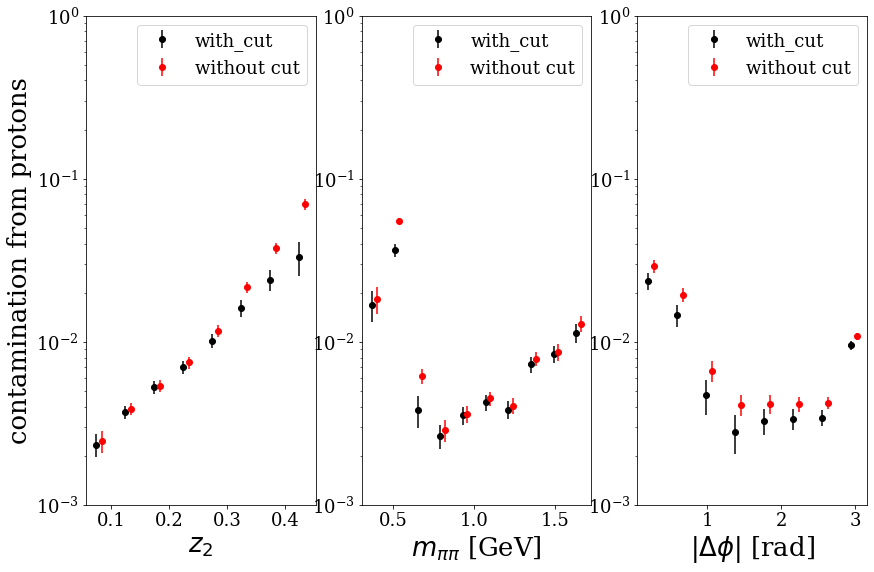

In [43]:
def p1p2nu_plot(df,xvar='dphi',xlabel='$|\\Delta\\phi_{\\mathrm{cm}}|$',bins=None,nbins=8):
    if 'pass_recon' in df.keys():
        df = df.query('pass_recon!=0')
    
    yy = df.eval(xvar)
    if bins is None:
        bins = np.linspace(yy.quantile(.001), yy.quantile(.999), nbins)
    def weights(df):
        return None
#        return df.weight_reco/df.weight_reco
        #return df.weight_reco
    nprcut,x = np.histogram(df.query('(abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212) and h1_p+h2_p<nu').eval(xvar),bins=bins,weights=weights(df.query('(abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212) and h1_p+h2_p<nu')))
    ntotcut,x = np.histogram(df.query("h1_p+h2_p<nu").eval(xvar),bins=bins, weights=weights(df.query("h1_p+h2_p<nu")))


    npr,x = np.histogram(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212').eval(xvar),bins=bins, weights=weights(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212')))
    ntot,x = np.histogram(df.eval(xvar),bins=bins, weights=weights(df))


    x = np.divide(np.add(x[1:],x[:-1]),2)
    plt.errorbar(x,nprcut/ntotcut, np.sqrt(npr*(ntot-npr)/ntot**3),color='k', label = "with_cut", 
                 linestyle='', marker='o')
    plt.errorbar(x+0.2*(x[1]-x[0]),npr/ntot, np.sqrt(nprcut*(ntot-nprcut)/ntot**3), color='r', label = "without cut", 
                 linestyle='', marker='o')
    
    
    plt.gca().set_ylim(.001,1)
    plt.gca().set_yscale('log')
    plt.gca().set_ylabel('contamination from protons')
    plt.gca().set_xlabel(xlabel)
    plt.legend()
    

df = R2h_module.applyCutsPair(dfs_mc_unw['D'].query("h1_pid*h2_pid<0"),nomCuts=False)\
        .query(R2h_module.pair_cut_nom.replace('and (h1_p+h2_p)/nu<1.0', " "))
mass_expr = "(abs(h2_truth_pid)==2212)*.9383+(abs(h2_truth_pid)==321)*.493677+(abs(h2_truth_pid)==211)*.1396"
df.eval(f'h2_truth_p = sqrt((h2_truth_z*nu_truth)**2-({mass_expr})**2)',inplace=True)
df.eval(f'h1_truth_p = sqrt((h1_truth_z*nu_truth)**2-({mass_expr.replace("h2","h1")})**2)',inplace=True)
df = df.query("abs(h1_p/h1_truth_p-1)<.15 and abs(h2_p/h2_truth_p-1)<.15")
fig,axs = plt.subplots(1,3,figsize=(14,9))
plt.sca(axs[0])
p1p2nu_plot(df,xvar='h2_z',xlabel='$z_2$',
         bins=np.linspace(R2h_module.minz2,R2h_module.maxz2,R2h_module.dpionz2BinsEdges))
#plt.savefig('images/particle_misid/misid_unc_dphicm.png',bbox_inches='tight')

plt.sca(axs[1])
p1p2nu_plot(df,xvar='pair_mass',xlabel='$m_{\\pi\\pi}$ [GeV]',
           bins=np.linspace(R2h_module.minzmass,R2h_module.maxzmass,R2h_module.dpionMassBinsEdges))
#plt.savefig('images/particle_misid/misid_unc_z2.png',bbox_inches='tight')
plt.ylabel("")

plt.sca(axs[2])
p1p2nu_plot(df,xvar='dphi',xlabel='$|\\Delta\\phi|$ [rad]',
         bins=np.linspace(R2h_module.mindphi,R2h_module.maxdphi,R2h_module.dpiondphiBinsEdges))
#plt.savefig('images/particle_misid/misid_unc_pair_mass.png',bbox_inches='tight')
plt.ylabel("")
plt.show()
